In [13]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import scipy
import numpy as np

In [14]:
dlc_df = pd.read_csv('dlc_2021/dataset/dataframes/10k.csv')
chess_df = pd.concat([
    pd.read_csv('chess_vision/dataset/dataframes/train.csv'),
    pd.read_csv('chess_vision/dataset/dataframes/test.csv'),
])

In [15]:
def fix_path(path):
    path = path.replace('/home/stevie/git', '/Users/sdale/repos/gatech/machine_learning/assignment_1')
    if not os.path.exists(path):
        print(path)
    assert(os.path.exists(path))
    return path
dlc_df['path'] = dlc_df['path'].apply(fix_path)
chess_df['path'] = chess_df['path'].apply(fix_path)

In [16]:
live_df = dlc_df[dlc_df['label'] == 'live']
screen_df = dlc_df[dlc_df['label'] == 'screen']

In [17]:
CHANNEL = 1
N = 1000
live_pixels = []
live_vec = []
for i, row in live_df.sample(n=N).iterrows():
    img = plt.imread(row['path'])
    img = cv2.resize(img, (32, 32))
    live_vec.append(img)
    single_channel = img[:,:,CHANNEL]
    live_pixels.append(single_channel.flatten())
screen_pixels = []
screen_vec = []
for i, row in screen_df.sample(n=N).iterrows():
    img = plt.imread(row['path'])
    img = cv2.resize(img, (32, 32))
    screen_vec.append(img)
    single_channel = img[:,:,CHANNEL]
    screen_pixels.append(single_channel.flatten())

/var/folders/d1/0dgw1b0x40d0mwh5qcfsyx7c0000gq/T/ipykernel_22040/2835841736.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(live_pixels, hist=True, kde_kws={'shade': True, 'linewidth': 3},
/Users/sdale/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/d1/0dgw1b0x40d0mwh5qcfsyx7c0000gq/T/ipykernel_22040/2835841736.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed 

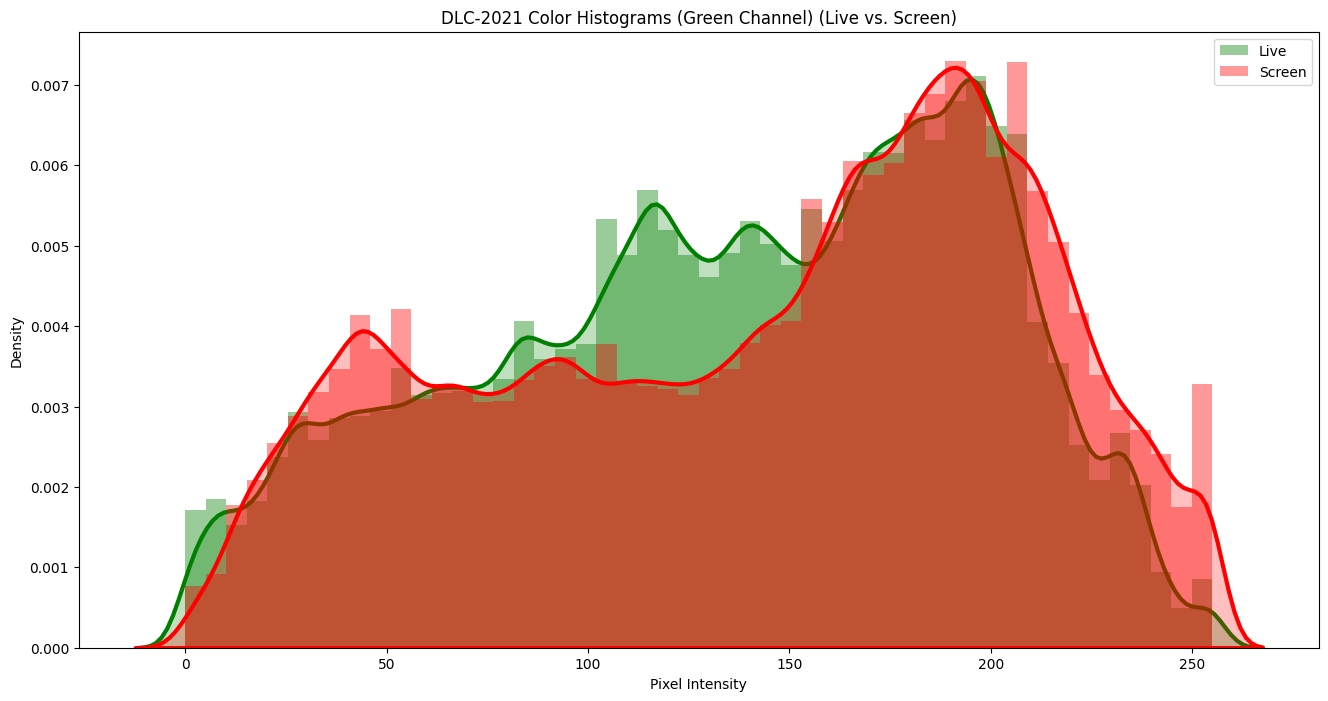

In [26]:
plt.figure(figsize=(16, 8))
plt.title("DLC-2021 Color Histograms (Green Channel) (Live vs. Screen)")
sns.distplot(live_pixels, hist=True, kde_kws={'shade': True, 'linewidth': 3}, 
                color='green', label='Live')
sns.distplot(screen_pixels, hist=True, kde_kws={'shade': True, 'linewidth': 3}, 
                color='red', label='Screen')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()

In [27]:
a1_df = chess_df[chess_df['label'] == 'a1']
a2_df = chess_df[chess_df['label'] == 'a2']

In [20]:
a1_pixels = []
a1_vec = []
for i, row in a1_df.iterrows():
    img = plt.imread(row['path'])
    img = cv2.resize(img, (32, 32))
    a1_vec.append(img)
    single_channel = img[:,:,CHANNEL]
    a1_pixels.append(single_channel.flatten())
a2_pixels = []
a2_vec = []
for i, row in a2_df.iterrows():
    img = plt.imread(row['path'])
    img = cv2.resize(img, (32, 32))
    a2_vec.append(img)
    single_channel = img[:,:,CHANNEL]
    a2_pixels.append(single_channel.flatten())

/var/folders/d1/0dgw1b0x40d0mwh5qcfsyx7c0000gq/T/ipykernel_22040/2939835246.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a1_pixels, hist=True, kde_kws={'shade': True, 'linewidth': 3},
/Users/sdale/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/d1/0dgw1b0x40d0mwh5qcfsyx7c0000gq/T/ipykernel_22040/2939835246.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in

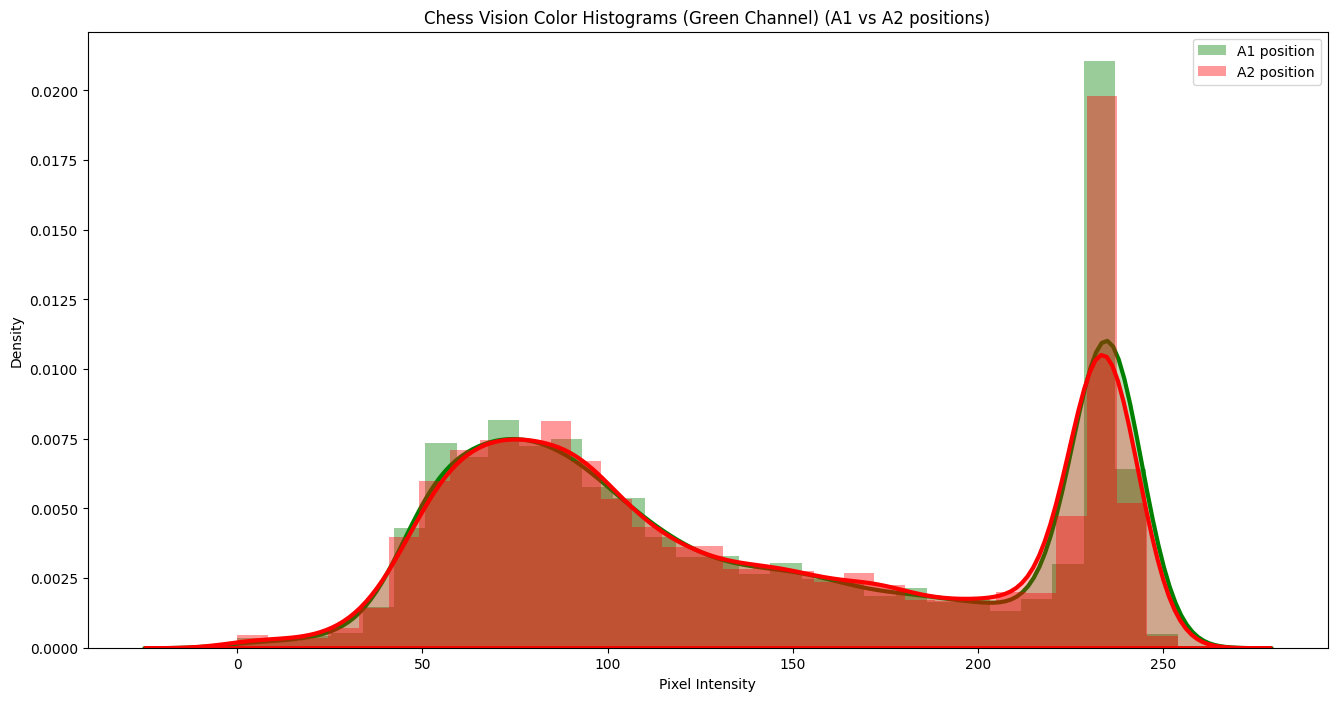

In [24]:
plt.figure(figsize=(16, 8))
plt.title("Chess Vision Color Histograms (Green Channel) (A1 vs A2 positions)")
sns.distplot(a1_pixels, hist=True, kde_kws={'shade': True, 'linewidth': 3}, 
                color='green', label='A1 position')
sns.distplot(a2_pixels, hist=True, kde_kws={'shade': True, 'linewidth': 3}, 
                color='red', label='A2 position')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.legend()

In [22]:
live_vec = np.array(live_vec)
# flatten only the first 3 dimmensions
live_vec = live_vec.reshape(-1, 3)
live_vec.shape

screen_vec = np.array(screen_vec)
# flatten only the first 3 dimmensions
screen_vec = screen_vec.reshape(-1, 3)
screen_vec.shape

a1_vec = np.array(a1_vec)
# flatten only the first 3 dimmensions
a1_vec = a1_vec.reshape(-1, 3)
a1_vec.shape

a2_vec = np.array(a2_vec)
# flatten only the first 3 dimmensions
a2_vec = a2_vec.reshape(-1, 3)
a2_vec.shape

(40960, 3)

In [23]:
dlc_div = scipy.special.kl_div(live_vec/255, screen_vec/255)
chess_div = scipy.special.kl_div(a1_vec/255, a2_vec/255)
print(f"DLC-2021: {dlc_div[~np.isinf(dlc_div)].mean()}")
print(f"Chess Vision: {chess_div[~np.isinf(chess_div)].mean()}")

DLC-2021: 0.12196835846628507
Chess Vision: 0.09290778626241727
